In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns


import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from scipy.io import loadmat #.mat for python processing
from scipy.io import savemat

In [2]:
# Load .mat data
data_train = loadmat('./data_train.mat')['data_train']
label_train = loadmat('./label_train.mat')['label_train']
data_test = loadmat('./data_test.mat')['data_test']

# Turn into dataframes
df_train = pd.DataFrame(data_train, columns=[f'Feature_{i+1}' for i in range(data_train.shape[1])])
df_label = pd.DataFrame(label_train, columns=['Label'])
df_test = pd.DataFrame(data_test, columns=[f'Feature_{i+1}' for i in range(data_test.shape[1])])

df_train.head(), df_label.head(), df_test.head()

(   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
 0  -1.307688  -1.174212   0.109318  -0.939535  -3.072989
 1  -0.433592  -0.192240   1.814015  -0.037533   0.626279
 2   0.342624  -0.274070   0.312024  -1.896304  -0.286685
 3   3.578397   1.530073   1.804494  -2.127977  -0.197343
 4   2.769437  -0.249025  -0.723121  -1.176923   0.405605,
    Label
 0      1
 1      1
 2      1
 3      1
 4      1,
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
 0   1.532322   2.505856  -0.117636   2.700224   0.589047
 1   0.791766   3.180243   0.769253   0.087467   1.178948
 2   1.232938   2.060771   0.063956   1.921177   0.090001
 3   0.109037   2.080132  -0.540951  -0.264707   0.401471
 4   0.901860   1.924153   2.430004   1.736052   0.979496)

In [3]:
df_train.shape, df_label.shape, df_test.shape

((420, 5), (420, 1), (26, 5))

In [4]:
df_train.info(), df_label.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  420 non-null    float64
 1   Feature_2  420 non-null    float64
 2   Feature_3  420 non-null    float64
 3   Feature_4  420 non-null    float64
 4   Feature_5  420 non-null    float64
dtypes: float64(5)
memory usage: 16.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Label   420 non-null    int16
dtypes: int16(1)
memory usage: 968.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  26 non-null     float64
 1   Feature_2  26 non-null     float64
 2   Feature_3  26 non-null     float64
 3   Feature_4  26 no

(None, None, None)

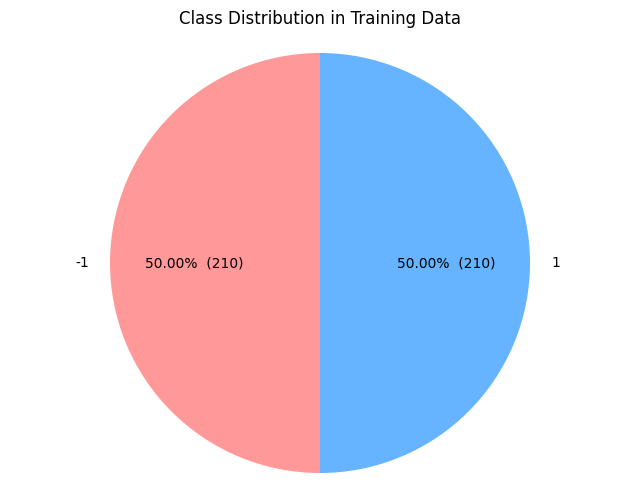

In [5]:
# Assuming class_distribution is obtained as shown earlier
class_distribution = df_label['Label'].value_counts().sort_index()

# Define a nice color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_distribution, labels=class_distribution.index, 
        autopct=lambda p: '{:.2f}%  ({:d})'.format(p, int(p/100.*class_distribution.sum())), 
        startangle=90, colors=colors)
plt.title('Class Distribution in Training Data')
plt.axis('equal') 

plt.show()

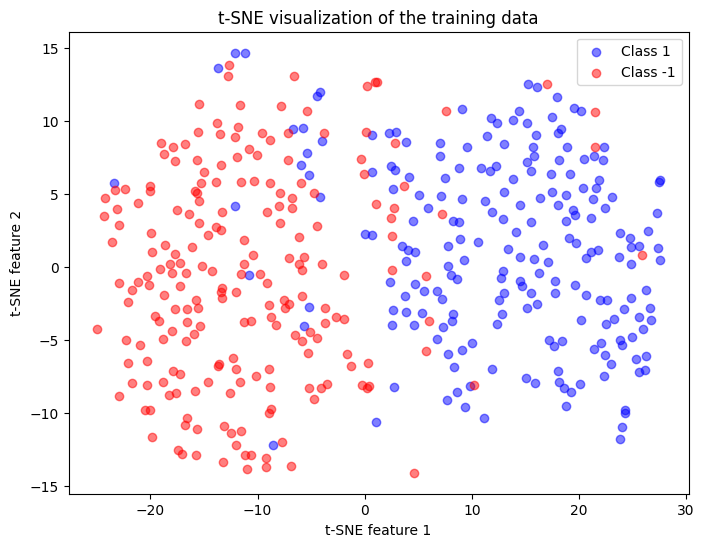

In [6]:
tsne = TSNE(n_components=2, random_state=42)  
tsne_results = tsne.fit_transform(df_train)  

df_tsne = pd.DataFrame(data=tsne_results, columns=['t-SNE feature 1', 't-SNE feature 2'])

df_tsne['Label'] = df_label

plt.figure(figsize=(8, 6))
colors = {1: 'blue', -1: 'red'}  # color
for label, color in colors.items():
    subset = df_tsne[df_tsne['Label'] == label]
    plt.scatter(subset['t-SNE feature 1'], subset['t-SNE feature 2'], c=color, label=f'Class {label}', alpha=0.5)

plt.title('t-SNE visualization of the training data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()
plt.show()


In [7]:
df_train.shape, df_test.shape

((420, 5), (26, 5))

#  Classifier
## Bayes Decision Rule
### Training
Assuming the dataset is **Gaussian Distributed**.
For class in *label_train*, class 1 and class 2 are valued **1** and **-1** respectively. 

In [8]:
# Estimate the mean and covariance matrix for each class
mean_1 = df_train[df_label['Label'] == 1].mean()
mean_2 = df_train[df_label['Label'] == -1].mean()

cov_1 = df_train[df_label['Label'] == 1].cov()
cov_2 = df_train[df_label['Label'] == -1].cov()

# prior probabilities
total_samples = df_label.shape[0]
prior_prob_1 = class_distribution[1] / total_samples
prior_prob_2 = class_distribution[-1] / total_samples

mean_1, mean_2, cov_1, cov_2, prior_prob_1, prior_prob_2

(Feature_1    0.013795
 Feature_2   -0.087557
 Feature_3    0.084613
 Feature_4   -0.154829
 Feature_5    0.022750
 dtype: float64,
 Feature_1    1.051708
 Feature_2    1.799575
 Feature_3    0.859565
 Feature_4    1.064208
 Feature_5    1.008555
 dtype: float64,
            Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
 Feature_1   1.120422   0.056470  -0.004566   0.028500   0.051226
 Feature_2   0.056470   0.938438   0.027564  -0.041744   0.075435
 Feature_3  -0.004566   0.027564   0.852206  -0.093992   0.049222
 Feature_4   0.028500  -0.041744  -0.093992   0.946492   0.077591
 Feature_5   0.051226   0.075435   0.049222   0.077591   1.169571,
            Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
 Feature_1   1.047751   0.097444  -0.040008  -0.044289   0.065132
 Feature_2   0.097444   0.839017  -0.090196   0.000991  -0.078350
 Feature_3  -0.040008  -0.090196   1.097210   0.051373   0.011238
 Feature_4  -0.044289   0.000991   0.051373   1.037771   0.045895
 Feature_

In [9]:
# Calculate class-conditional probabilities
def class_conditional_prob(x, mean, cov):
    d = len(mean)  # Dimension of the feature vector
    var = x - mean
    return (1 / np.sqrt((2 * np.pi)**d * np.linalg.det(cov))) * np.exp(-0.5 * var.T @ np.linalg.inv(cov) @ var)

def cov_bayesian_classifier(x, mean1, cov1, prior1, mean2, cov2, prior2):
    prob1 = class_conditional_prob(x, mean1, cov1) * prior1
    prob2 = class_conditional_prob(x, mean2, cov2) * prior2
    
    if prob1 > prob2:
        return 1 # Class 1
    elif prob1 < prob2:
        return -1 # Class 2
    else:
        return 0  # Right on the boundary

### A Case Studty of Visualization for Training Data
Using t-SNE for dimensionality reduction and visualization of the training data in 2D space.(since the data have 5 features)
But our classifier is based on 5 features, can't easily visualize the decision boundary in 5D space.


### Testing

In [10]:

# predict the labels
y_pred = [cov_bayesian_classifier(row.values, mean_1, cov_1, prior_prob_1, mean_2, cov_2, prior_prob_2) for index, row in df_test.iterrows()]
y_pred = pd.DataFrame(y_pred, columns=['Predicted Label'])
y_pred


,Predicted Label
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


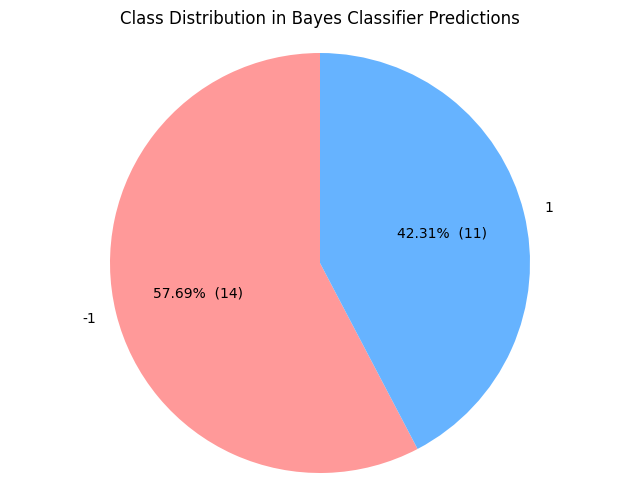

In [11]:
# Assuming class_distribution is obtained as shown earlier
pred_distri_naive = y_pred['Predicted Label'].value_counts().sort_index()

# Define a nice color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(pred_distri_naive, labels=pred_distri_naive.index, 
        autopct=lambda p: '{:.2f}%  ({:d})'.format(p, int(p/100.*pred_distri_naive.sum())), 
        startangle=90, colors=colors)
plt.title('Class Distribution in Bayes Classifier Predictions')
plt.axis('equal') 

plt.show()

In [12]:
# Save results
y_pred.to_csv('./results/bayes_predic.csv', index=False)

# .mat
y_pred_dict = {'y_pred': y_pred.values}
savemat('./results/bayes_predic.mat', y_pred_dict)

## Naive Bayes Classifier
There are 3 types of Naive Bayes Classifier:
1. Gaussian Naive Bayes
2. Bernoulli Naive Bayes
3. Multinomial Naive Bayes

Since our dataset is assumed Gaussian Distributed and continuous, we will use **Gaussian Naive Bayes**.
### Training

In [13]:
stats = df_train.groupby(df_label['Label']).agg(['mean', 'std'])
stats

Feature_1           Feature_2           Feature_3           Feature_4  \
           mean       std      mean       std      mean       std      mean   
Label                                                                         
-1     1.051708  1.023597  1.799575  0.915979  0.859565  1.047478  1.064208   
 1     0.013795  1.058500 -0.087557  0.968730  0.084613  0.923150 -0.154829   

                Feature_5            
            std      mean       std  
Label                                
-1     1.018710  1.008555  1.010169  
 1     0.972878  0.022750  1.081467

In [14]:
def gaussian_pdf(x, mean, std):
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x - mean) ** 2 / (2 * std ** 2)))


def naive_bayes_classifier(stats, input_features):
    y_pred = []
    for i in range(input_features.shape[0]):
        row = input_features.iloc[i]
        probabilities = {}
        for label, params in stats.groupby(level=0):
            probabilities[label] = 1
            for feature in input_features.columns:
                feature_mean = params.loc[label, (feature, 'mean')]
                feature_std = params.loc[label, (feature, 'std')]
                # Maximum likelihood estimation
                probabilities[label] *= gaussian_pdf(row[feature], feature_mean, feature_std)
        y_pred.append(max(probabilities, key=probabilities.get))
    return y_pred


### Testing

In [15]:
y_pred = naive_bayes_classifier(stats, df_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted Label'])

y_pred

,Predicted Label
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [16]:
test_stats = df_test.groupby(y_pred['Predicted Label']).agg(['mean', 'std'])

In [17]:
# Save results
y_pred.to_csv('./results/naive_bayes_predic.csv', index=False)

# .mat
y_pred_dict = {'y_pred': y_pred.values}
savemat('./results/naive_bayes_predic.mat', y_pred_dict)

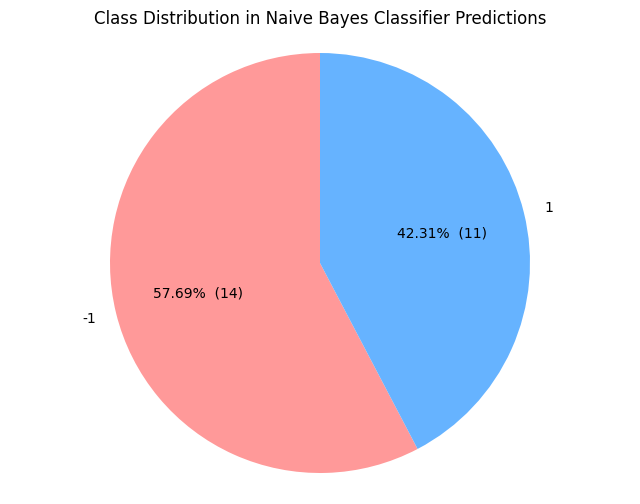

In [18]:
# Assuming class_distribution is obtained as shown earlier
pred_distri_naive = y_pred['Predicted Label'].value_counts().sort_index()

# Define a nice color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(pred_distri_naive, labels=pred_distri_naive.index, 
        autopct=lambda p: '{:.2f}%  ({:d})'.format(p, int(p/100.*pred_distri_naive.sum())), 
        startangle=90, colors=colors)
plt.title('Class Distribution in Naive Bayes Classifier Predictions')
plt.axis('equal') 

plt.show()

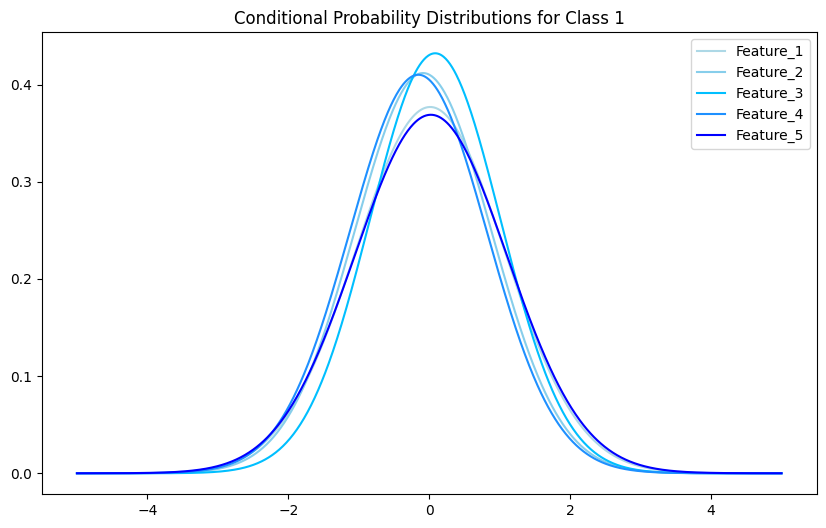

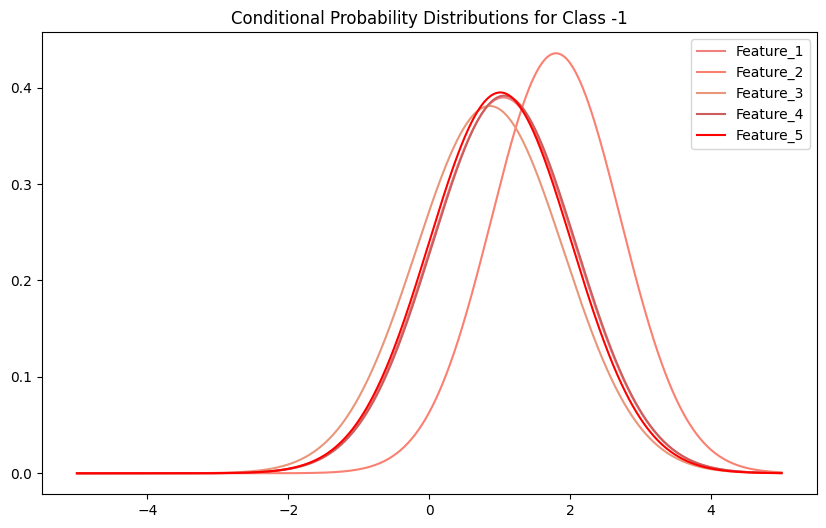

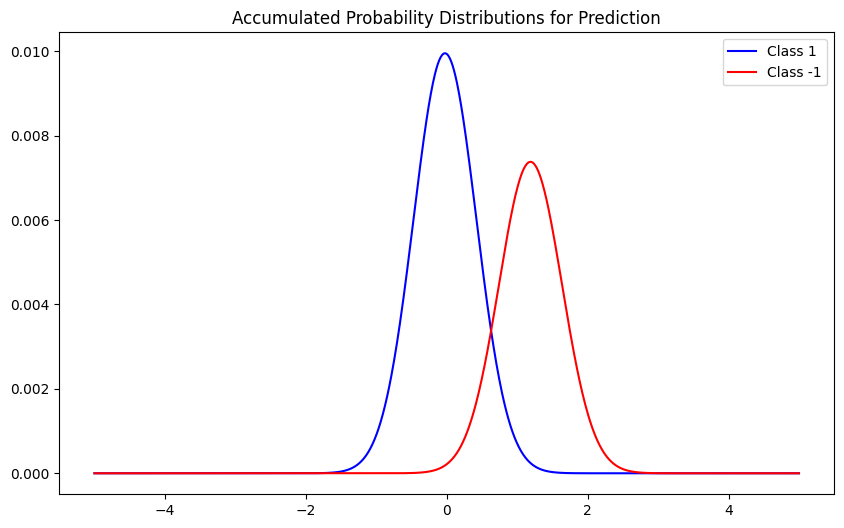

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-5, 5, 1000)  # 生成一个广泛的x值范围用于绘图
features = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']

# 定义两个类别对应的颜色系
colors_for_class_1 = ['lightblue', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue']  # 蓝色系
colors_for_class_minus_1 = ['lightcoral', 'salmon', 'darksalmon', 'indianred', 'red']  # 红色系

# 假设我们有两个类别1和-1
labels = [1, -1]

for label in labels:
    plt.figure(figsize=(10, 6))
    colors = colors_for_class_1 if label == 1 else colors_for_class_minus_1
    for feature, color in zip(features, colors):
        if label in stats.index:
            mean = stats.loc[label, (feature, 'mean')]
            std = stats.loc[label, (feature, 'std')]
            pdf = norm.pdf(x, mean, std)  # 计算高斯PDF
            plt.plot(x, pdf, label=f'{feature}', color=color)
    plt.title(f'Conditional Probability Distributions for Class {label}')
    plt.legend()
    plt.show()


#! noted that this plot is log scale
plt.figure(figsize=(10, 6))  # 创建一个新的图形对象
colors = {'1': 'blue', '-1': 'red'}  # 定义每个类别对应的颜色
for label in labels:
    total_pdf = np.zeros_like(x)  # 初始化累加的PDF
    for feature in features:
        mean = stats.loc[label, (feature, 'mean')]
        std = stats.loc[label, (feature, 'std')]
        pdf = norm.pdf(x, mean, std)  # 计算每个特征的PDF
        total_pdf += np.log(pdf)  # 对数概率累加

    total_pdf = np.exp(total_pdf)  # 将对数概率转换回原始概率
    # 使用预定义的颜色绘制累加的概率分布
    plt.plot(x, total_pdf, label=f'Class {label}', color=colors[str(label)])

plt.title('Accumulated Probability Distributions for Prediction')
plt.legend()
plt.show()

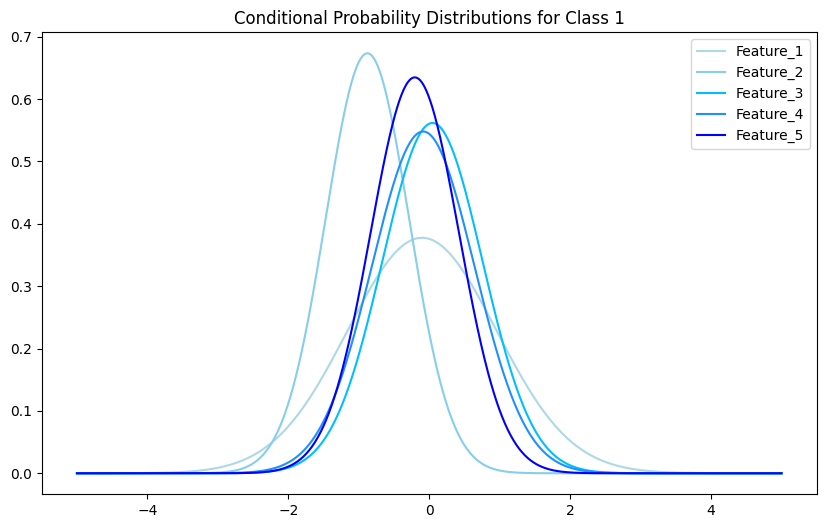

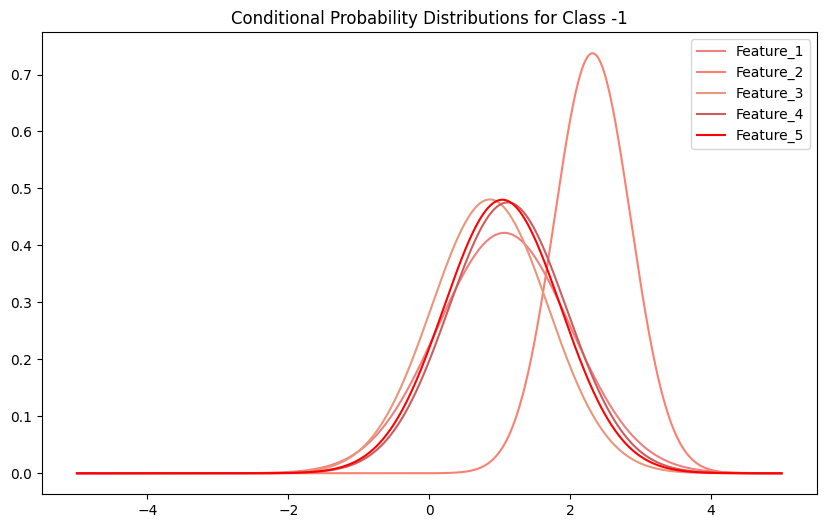

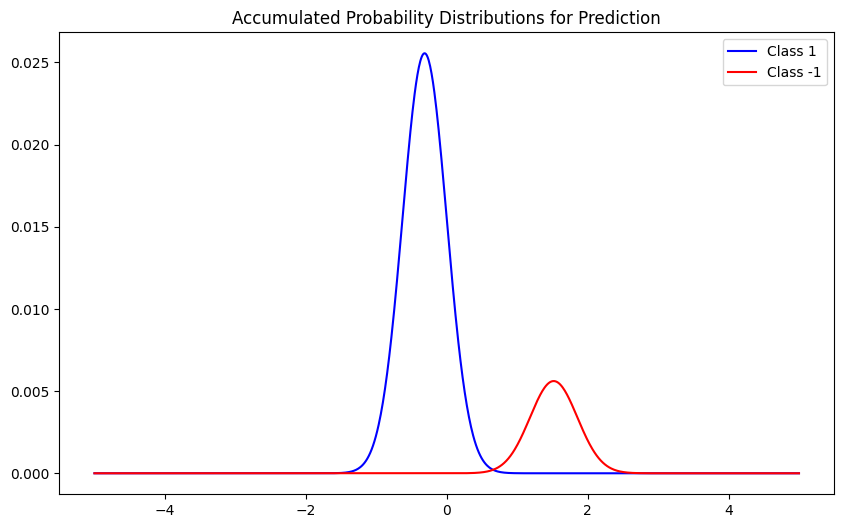

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-5, 5, 1000)  # 生成一个广泛的x值范围用于绘图
features = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']

# 定义两个类别对应的颜色系
colors_for_class_1 = ['lightblue', 'skyblue', 'deepskyblue', 'dodgerblue', 'blue']  # 蓝色系
colors_for_class_minus_1 = ['lightcoral', 'salmon', 'darksalmon', 'indianred', 'red']  # 红色系

# 假设我们有两个类别1和-1
labels = [1, -1]

for label in labels:
    plt.figure(figsize=(10, 6))
    colors = colors_for_class_1 if label == 1 else colors_for_class_minus_1
    for feature, color in zip(features, colors):
        if label in test_stats.index:
            mean = test_stats.loc[label, (feature, 'mean')]
            std = test_stats.loc[label, (feature, 'std')]
            pdf = norm.pdf(x, mean, std)  # 计算高斯PDF
            plt.plot(x, pdf, label=f'{feature}', color=color)
    plt.title(f'Conditional Probability Distributions for Class {label}')
    plt.legend()
    plt.show()


#! noted that this plot is log scale
plt.figure(figsize=(10, 6))  # 创建一个新的图形对象
colors = {'1': 'blue', '-1': 'red'}  # 定义每个类别对应的颜色
for label in labels:
    total_pdf = np.zeros_like(x)  # 初始化累加的PDF
    for feature in features:
        mean = test_stats.loc[label, (feature, 'mean')]
        std = test_stats.loc[label, (feature, 'std')]
        pdf = norm.pdf(x, mean, std)  # 计算每个特征的PDF
        total_pdf += np.log(pdf)  # 对数概率累加

    total_pdf = np.exp(total_pdf)  # 将对数概率转换回原始概率
    # 使用预定义的颜色绘制累加的概率分布
    plt.plot(x, total_pdf, label=f'Class {label}', color=colors[str(label)])

plt.title('Accumulated Probability Distributions for Prediction')
plt.legend()
plt.show()

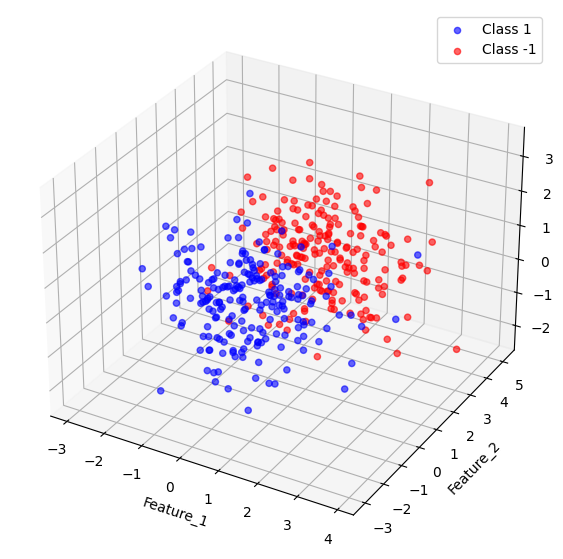

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 假设df_train是你的训练数据集，df_label是对应的标签
features = ['Feature_1', 'Feature_2', 'Feature_3']

# 合并数据和标签以便于过滤
df = pd.concat([df_train[features], df_label], axis=1)

# 类别和颜色映射
labels_colors = {1: 'blue', -1: 'red'}

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label, color in labels_colors.items():
    # 筛选当前类别的数据
    current_df = df[df['Label'] == label]
    
    # 绘制散点图
    ax.scatter(current_df[features[0]], current_df[features[1]], current_df[features[2]], 
               color=color, label=f'Class {label}', alpha=0.6)

# 设置轴标签
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])

# 图例
ax.legend()

# 显示图形
plt.show()


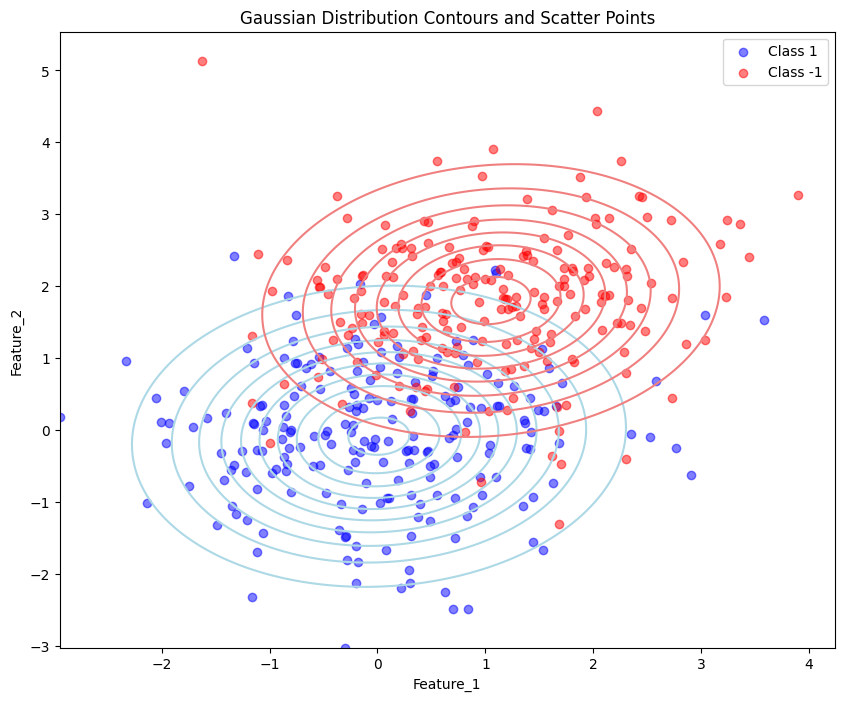

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

# 假设 df_train 包含特征数据，df_label 包含标签
# 合并数据和标签为一个DataFrame
df = pd.concat([df_train, df_label], axis=1)

features = ['Feature_1', 'Feature_2']
labels_colors = {1: ('blue', 'lightblue'), -1: ('red', 'lightcoral')}

# 创建一个网格来评估高斯分布
x, y = np.mgrid[df[features[0]].min():df[features[0]].max():.01, df[features[1]].min():df[features[1]].max():.01]
pos = np.dstack((x, y))

plt.figure(figsize=(10, 8))

for label, colors in labels_colors.items():
    # 筛选当前类别的数据
    current_df = df[df['Label'] == label]
    
    # 绘制散点图
    plt.scatter(current_df[features[0]], current_df[features[1]], color=colors[0], label=f'Class {label}', alpha=0.5)
    
    # 计算当前类别的均值和协方差矩阵
    mean = current_df[features].mean().values
    cov = current_df[features].cov().values
    rv = multivariate_normal(mean, cov)
    
    # 绘制高斯分布的等高线图
    plt.contour(x, y, rv.pdf(pos), colors=colors[1], levels=10)

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Gaussian Distribution Contours and Scatter Points')
plt.legend()
plt.show()


## Linear Discriminant Analysis
### Implementation

In [23]:
import numpy as np

class homemade_LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eig_vectors = None
        self.class_stats_lda = None

    def fit(self, X, y):
        # 计算类均值和总体均值
        class_means, overall_mean = self._compute_means(X, y)
        
        # calculate within-class scatter matrix and between-class scatter matrix
        S_W = self._compute_within_class_scatter_matrix(X, y, class_means)
        S_B = self._compute_between_class_scatter_matrix(X, y, class_means, overall_mean)
        
        eig_vals, eig_vecs = self._solve_eigen_problem(S_W, S_B)
        
        # choose first n_components eigenvectors
        self.eig_vectors = eig_vecs[:, :self.n_components]
        self._compute_class_stats_lda(X, y)

    def _compute_means(self, X, y):
        class_labels = np.unique(y)
        class_means = {}
        for cls in class_labels:
            class_means[cls] = np.mean(X[y == cls], axis=0)
        overall_mean = np.mean(X, axis=0)
        return class_means, overall_mean

    def _compute_within_class_scatter_matrix(self, X, y, class_means):
        n_features = X.shape[1]
        S_W = np.zeros((n_features, n_features))
        for cls, mean_vec in class_means.items():
            scatter_mat = np.zeros((n_features, n_features))
            for row in X[y == cls]:
                row_diff = (row - mean_vec).reshape(n_features, 1)
                scatter_mat += row_diff.dot(row_diff.T)
            S_W += scatter_mat
        return S_W

    def _compute_between_class_scatter_matrix(self, X, y, class_means, overall_mean):
        n_features = X.shape[1]
        S_B = np.zeros((n_features, n_features))
        for cls, mean_vec in class_means.items():
            n_cls = X[y == cls].shape[0]
            mean_diff = (mean_vec - overall_mean).reshape(n_features, 1)
            S_B += n_cls * mean_diff.dot(mean_diff.T)
        return S_B
    
    # solve the eigenvalue problem by computing S_W^(-1)S_B
    def _solve_eigen_problem(self, S_W, S_B):
        eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
        # sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(-eig_vals)
        sorted_eig_vals = eig_vals[sorted_indices]
        sorted_eig_vecs = eig_vecs[:, sorted_indices]
        return sorted_eig_vals, sorted_eig_vecs


    def _compute_class_stats_lda(self, X, y):
        self.class_stats_lda = {}
        X_lda = self.transform(X)
        for cls in np.unique(y):
            X_cls = X_lda[y == cls]
            if len(X_cls.shape) == 1:  # exdend to 2D array if only one feature
                X_cls = X_cls.reshape(-1, 1)
            self.class_stats_lda[cls] = {
                'mean': np.mean(X_cls, axis=0),
                'cov': np.cov(X_cls, rowvar=False) if X_cls.shape[1] > 1 else np.var(X_cls),
                'prior': np.mean(y == cls)
            }

    def transform(self, X):
        return X.dot(self.eig_vectors)
    
    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)
    
    def discriminant_function(self, X):
        X_lda = self.transform(X)
        discriminant_values = {}
        for cls, stats in self.class_stats_lda.items():
            diff = X_lda - stats['mean']
            if np.isscalar(stats['cov']):
                inv_cov = 1. / stats['cov']
                discriminant_values[cls] = -0.5 * np.sum(diff * diff * inv_cov, axis=1) \
                                        + np.log(stats['prior'])
            else:
                inv_cov = np.linalg.inv(stats['cov'])
                discriminant_values[cls] = -0.5 * np.sum(diff.dot(inv_cov) * diff, axis=1) \
                                        + np.log(stats['prior'])
        return discriminant_values

    def predict(self, X):
        discriminant_values = self.discriminant_function(X)
        classes = list(discriminant_values.keys())
        predicted_labels = [classes[i] for i in np.argmax(np.vstack(list(discriminant_values.values())), axis=0)]
        return predicted_labels


X_train = df_train.values
y_train = df_label['Label'].values
X_test = df_test.values

# project data on n dimensions
lda = homemade_LDA(n_components=1)

# fit and transform training data
X_train_lda = lda.fit_transform(X_train, y_train)

# prediction
X_test_lda = lda.transform(X_test)
X_test_label_lda = lda.predict(X_test)

In [24]:
# check the shape of the transformed data
X_train_lda.shape, X_test_lda.shape, X_train_lda,X_test_lda, X_test_label_lda

((420, 1),
 (26, 1),
 array([[ 2.45264822e+00],
        [-4.53969851e-01],
        [ 9.24700474e-01],
        [-1.71501203e+00],
        [ 4.57218961e-02],
        [ 1.82782837e+00],
        [-1.25053988e+00],
        [-8.61100378e-01],
        [-2.84938884e-01],
        [ 2.65518517e+00],
        [ 1.35004798e+00],
        [ 4.08202080e-01],
        [-8.05162122e-01],
        [-9.53896075e-01],
        [-4.84152175e-01],
        [ 2.22977376e-01],
        [ 1.03763111e+00],
        [ 7.28120814e-01],
        [-5.33802729e-01],
        [ 8.43098227e-01],
        [ 5.26066224e-01],
        [-2.02677499e-01],
        [ 1.91231557e+00],
        [ 5.68715692e-01],
        [-2.59426628e-01],
        [-2.14624132e-01],
        [ 1.43138595e+00],
        [ 2.35752069e-01],
        [ 4.74751855e-01],
        [ 9.69386999e-01],
        [ 1.37083318e+00],
        [ 5.45997698e-01],
        [-2.19420085e-01],
        [-1.19343530e+00],
        [-3.93274182e-01],
        [ 4.21639229e-01],
       

In [25]:
X_test_label_lda_df = pd.DataFrame(X_test_label_lda, columns=['Predicted Label'])
X_test_label_lda_df.to_csv('./results/LDA_predic_1D.csv', index=False)
X_test_label_lda_dict = {'Predicted Label': X_test_label_lda_df.values}
savemat('./results/LDA_predic_1D.mat', X_test_label_lda_dict)

### Plot

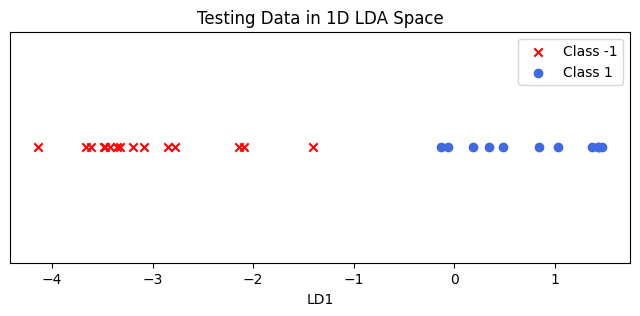

In [26]:
# # 将列表转换为 NumPy 数组
# X_test_lda = np.array(X_test_lda)
# X_test_label_lda = np.array(X_test_label_lda)

# # 绘制散点图
# plt.figure(figsize=(8, 6))
# for label, marker, color in zip([-1, 1], ['x', 'o'], ['red', 'royalblue']):
#     plt.scatter(X_test_lda[X_test_label_lda==label], X_test_lda[X_test_label_lda==label], 
#                 c=color, label=f'Class {label}', marker=marker)

# plt.title('Testing Data in 2D LDA Space')
# plt.xlabel('LD1')
# plt.ylabel('LD2')
# plt.legend(loc='best')
# plt.show()

# 将列表转换为 NumPy 数组
X_test_lda = np.array(X_test_lda)
X_test_label_lda = np.array(X_test_label_lda)

# 绘制散点图
plt.figure(figsize=(8, 3))
for label, marker, color in zip([-1, 1], ['x', 'o'], ['red', 'royalblue']):
    plt.scatter(X_test_lda[X_test_label_lda==label], [0]*len(X_test_lda[X_test_label_lda==label]), 
                c=color, label=f'Class {label}', marker=marker)

plt.title('Testing Data in 1D LDA Space')
plt.xlabel('LD1')
plt.yticks([])  # 隐藏y轴
plt.legend(loc='best')
plt.show()

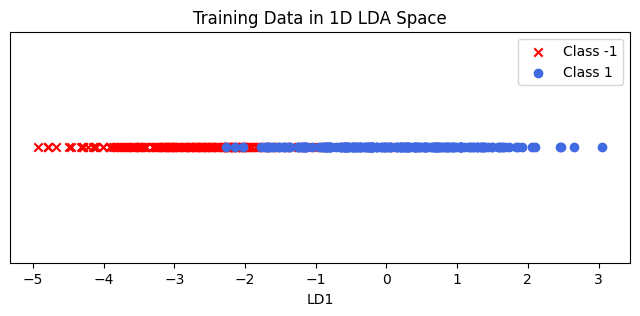

In [27]:
# import numpy as np
# import matplotlib.pyplot as plt

# # 绘制散点图
# plt.figure(figsize=(8, 6))
# for label, marker, color in zip([-1, 1], ['x', 'o'], ['red', 'royalblue']):
#     plt.scatter(X_train_lda[y_train==label, 0], X_train_lda[y_train==label, 1], 
#                 c=color, label=f'Class {label}', marker=marker)

# plt.title('Training Data in 2D LDA Space')
# plt.xlabel('LD1')
# plt.ylabel('LD2')
# plt.legend(loc='best')
# plt.show()


# 绘制散点图
plt.figure(figsize=(8, 3))
for label, marker, color in zip([-1, 1], ['x', 'o'], ['red', 'royalblue']):
    plt.scatter(X_train_lda[y_train==label, 0], [0]*len(X_train_lda[y_train==label]), 
                c=color, label=f'Class {label}', marker=marker)

plt.title('Training Data in 1D LDA Space')
plt.xlabel('LD1')
plt.yticks([])  # 隐藏y轴
plt.legend(loc='best')
plt.show()

# Results Comparison
Comparing the results of the 3 classifiers.
1. Bayes Decision Rule
2. Naive Bayes Classifier
3. Linear Discriminant Analysis


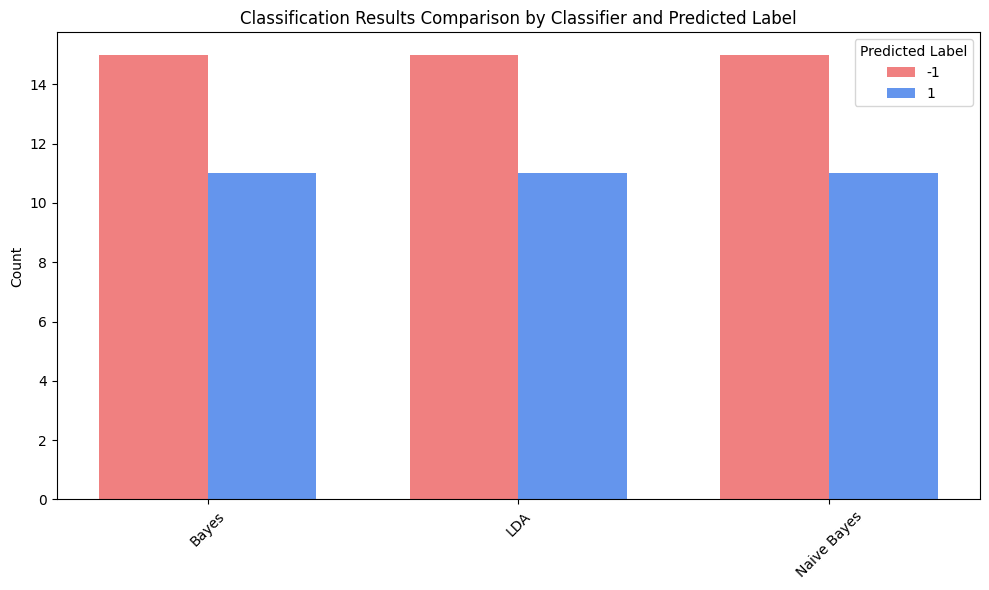

In [28]:
# 加载CSV文件
bayes_predic = pd.read_csv('./results/bayes_predic.csv')
lda_predic = pd.read_csv('./results/LDA_predic.csv')
naive_bayes_predic = pd.read_csv('./results/naive_bayes_predic.csv')

# 为每个分类器的结果添加一个标识符
bayes_predic['Classifier'] = 'Bayes'
lda_predic['Classifier'] = 'LDA'
naive_bayes_predic['Classifier'] = 'Naive Bayes'

# 合并三个数据框
combined_predictions = pd.concat([bayes_predic, lda_predic, naive_bayes_predic])

# 创建分组数据，为后续的分组柱状图做准备
grouped_data = combined_predictions.groupby(['Classifier', 'Predicted Label']).size().unstack(fill_value=0).reset_index()

# 设置每个预测类别的颜色
colors = {-1: 'lightcoral', 1: 'cornflowerblue'}

# 分类器的数量
n_labels = grouped_data.shape[0]

# 柱状图的位置和宽度
ind = np.arange(n_labels)
width = 0.35

# 创建分组柱状图
fig, ax = plt.subplots(figsize=(10, 6))
for label in grouped_data.columns[1:]:
    ax.bar(ind - width/2 if label == -1 else ind + width/2, grouped_data[label], width, label=label, color=colors[label])

# 设置图表的标签和标题
ax.set_ylabel('Count')
ax.set_title('Classification Results Comparison by Classifier and Predicted Label')
ax.set_xticks(ind)
ax.set_xticklabels(grouped_data['Classifier'])
ax.legend(title='Predicted Label')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

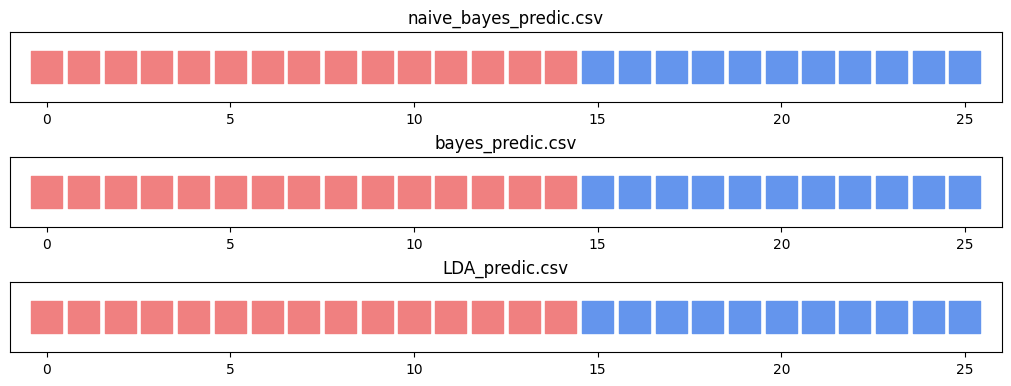

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# 文件列表
files = ['naive_bayes_predic.csv', 'bayes_predic.csv', 'LDA_predic.csv']

# 设置画布
fig, axs = plt.subplots(len(files), 1, figsize=(10, len(files) * 1.25), constrained_layout=True)

for idx, file in enumerate(files):
    # 读取CSV文件
    data = pd.read_csv(f'./results/{file}', usecols=['Predicted Label'])

    # 检查是否只有一列，如果不是，取第一列
    if len(data.columns) > 1:
        data = data[data.columns[0]]

    # 将索引作为x轴，所有值设为1作为y轴（因为我们只需要展示颜色）
    x = data.index
    y = [1] * len(data)

    # 根据值设置颜色，-1为红色，1为蓝色
    colors = ['lightcoral' if val == -1 else 'cornflowerblue' for val in data['Predicted Label']]

    # 绘制散点图，s参数控制方块的大小
    axs[idx].scatter(x, y, c=colors, marker='s', s=500)

    # 移除y轴的标记
    axs[idx].get_yaxis().set_visible(False)

    # 设置x轴的范围为索引的最小和最大值，略微扩展
    axs[idx].set_xlim([x.min()-1, x.max()+1])

    # # 标注类别的第一个和最后一个索引
    # first_index = x.min()
    # last_index = x.max()
    # axs[idx].text(first_index, 1.05, f'{first_index}', ha='center')
    # axs[idx].text(last_index, 1.05, f'{last_index}', ha='center')

    # 设置标题为文件名
    axs[idx].set_title(file)

plt.show()
